# Imports

In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd

from keras.models import Sequential # 1 neural network pls = 1 model
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import text

from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/home/nathan/anaconda3/envs/deepLearning/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Define Constants

img_rows, img_cols: Input image dimensions in pixels  
in_shape: For keras (tensorflow), the dimensions of our input for a 2D convolutional layer  
batch_size: Number of images used in each minibatch  
nb_classes: One class per digit  
nb_epoch: Number of times the whole data is used to learn

In [2]:
img_rows, img_cols = 28, 28
in_shape = (img_rows, img_cols, 1)
batch_size = 256
nb_classes = 10
nb_epoch = 3

# Data

Here we are given a set of training and testing data. We will use the training data to train the neural network, and the testing data as submission to kaggle

In [3]:
train = pd.read_csv('train.csv').values
test  = pd.read_csv('test.csv').values

## Training data

#### Inputs (X)

First we need reshape our data to be used by a Tensorflow CNN. This follows the format: (nb_of_samples, img_width, img_heigh, nb_of_color_channels)

In [4]:
X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)

In [5]:
X_train.shape

(42000, 28, 28, 1)

Next we need to make sure everything is a float. Then divide it by 255 to normalize the values between [0;1] rather than [0;255]

In [6]:
X_train = X_train.astype('float32')
X_train /= 255

#### Outputs (Y)

For the outputs, we need to get the zero'th column of train. Next we will use np_utils to one-hot-encode out vector into a binary class matrix.

[image: 28,28 ] = [0,0,0,1,0,0,0,0,0,0]

In [7]:
Y_train = y_train = train[:, 0]

In [8]:
Y_train[10]

8

In [9]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [10]:
Y_train[10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

## Testing data

#### Inputs (X)

For the testing data, we are not given outputs. This means that we only need to follow the reshape procedure of the training inputs (X)

In [11]:
X_test = test.reshape(test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

## Check shapes of all training and testing data.

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("X_test shape : {}".format(X_test.shape))

X_train shape: (42000, 28, 28, 1)
Y_train shape: (42000, 10)
X_test shape : (28000, 28, 28, 1)


## Visualize data

Below we are going to visualize on of the inputs (X) for our training data to make sure it looks correct.

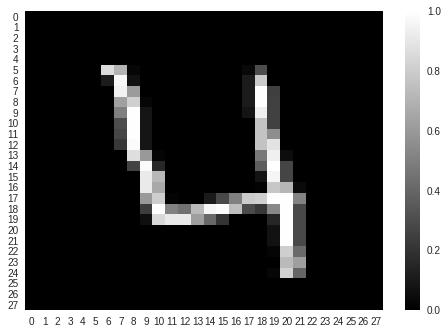

In [13]:
sns.heatmap(X_train[3].reshape(28,28), cmap='gray')

# Model

Next we are going to define our convolutional neural network, we are going to use three convolution layers and two fully connected layers

## Create sequential model object

In [54]:
model = Sequential()

## Add convolution layers

In [56]:
model.add(Convolution2D(16, 3, 3, border_mode='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 28, 28, 16)    160         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 28, 28, 16)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 14, 14, 16)    0           activation_7[0][0]               
Total params: 160
Trainable params: 160
Non-trainable params: 0
____________________________________________________________________________________________________


In [58]:
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [59]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 28, 28, 16)    160         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 28, 28, 16)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 14, 14, 16)    0           activation_7[0][0]               
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 14, 14, 32)    4640        maxpooling2d_5[0][0]             
___________________________________________________________________________________________

In [60]:
model.add(Convolution2D(32, 6, 4, border_mode='same', activation='relu'))

In [61]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 28, 28, 16)    160         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 28, 28, 16)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 14, 14, 16)    0           activation_7[0][0]               
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 14, 14, 32)    4640        maxpooling2d_5[0][0]             
___________________________________________________________________________________________

## Add fully connected layers

In [62]:
model.add(Flatten())  # this converts our 2D feature maps to 1D feature vectors
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 28, 28, 16)    160         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 28, 28, 16)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 14, 14, 16)    0           activation_7[0][0]               
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 14, 14, 32)    4640        maxpooling2d_5[0][0]             
___________________________________________________________________________________________

In [63]:
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # helps prevent overfitting
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 28, 28, 16)    160         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 28, 28, 16)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 14, 14, 16)    0           activation_7[0][0]               
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 14, 14, 32)    4640        maxpooling2d_5[0][0]             
___________________________________________________________________________________________

In [64]:
model.add(Dense(nb_classes)) # nb_classes should be 10 for mnist
model.add(Activation('softmax'))

The .summary() allows us to peak inside our model. This allows you to see the overall structure of your model

In [65]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 28, 28, 16)    160         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 28, 28, 16)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 14, 14, 16)    0           activation_7[0][0]               
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 14, 14, 32)    4640        maxpooling2d_5[0][0]             
___________________________________________________________________________________________

## Compile model
This step allows you to tell the model what optimizer you want (the thing that controls learning rate), what type of loss to use, and all other sorts of things

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

## Train model!

loss: the loss of the training data  
acc: the accuracy of the training data  
val_loss: the loss of the validation set  
val_acc: the accuracy of the validation data  

In [43]:
model.fit(X_train, Y_train, # specify training data
          batch_size=batch_size, # use this many images per mini-batch - memory dependent - 256
          nb_epoch=nb_epoch, # go through my training data this number of times - 3
          validation_split=.2, # use 20% of the training data as validation data
          verbose=True # please print things 
         )

Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 2s - loss: 0.3936 - acc: 0.8783 - val_loss: 0.1111 - val_acc: 0.9649
Epoch 2/3
33600/33600 [==============================] - 1s - loss: 0.0865 - acc: 0.9742 - val_loss: 0.0654 - val_acc: 0.9783
Epoch 3/3
33600/33600 [==============================] - 1s - loss: 0.0546 - acc: 0.9831 - val_loss: 0.0575 - val_acc: 0.9804


# Predict test data

In [70]:
Y_pred = model.predict(X_test)

In [71]:
Y_pred[0]

array([  1.55021382e-07,   4.81761298e-10,   9.99993324e-01,
         5.71173041e-06,   1.58174895e-08,   1.33733358e-10,
         2.03723843e-10,   3.31026854e-07,   4.35285557e-07,
         1.24583668e-08], dtype=float32)

In [53]:
model.save_weights('mnist_weights.h5')

In [69]:
model.load_weights('mnist_weights.h5')

Save predictions to test file for Kaggle submission

np.savetxt('mnist-pred4.csv', np.c_[range(1,len(Y_pred)+1),Y_pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')